# Housing Price Simulation.

A notebook by *List your names here*.

Then, add alternating code cells and description/markdown cells,
between this top cell and the final "Running DocTest tests" section,
to answer all the elements of the final project programming assignment.

The answer to each part must be clearly identified with,
the text "Step 1" for Step 1, "Step 2" for Step 2, etc.
As noted in the assignment, you may do some of the work in copies of this project
for different sub-experiments,
rather than just putting it all in this notebook,
if you like.

In [4]:
import numpy as np
import doctest
import matplotlib.pyplot as plt

## Data Generation

Income: [ 2.00001045  2.00004462  2.00007765 ... 10.76171358 12.98125784
 19.86167776]
Housing Distance: [9.26875177e-05 1.08873205e-04 1.46713803e-04 ... 8.04923777e+00
 8.18117213e+00 8.63709942e+00]


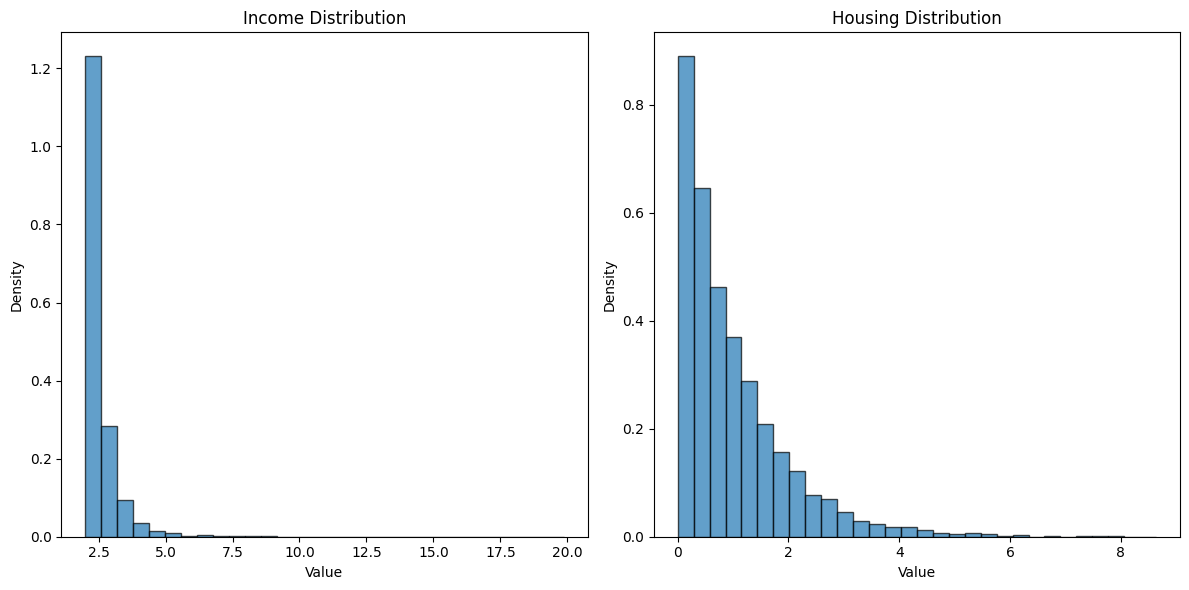

In [5]:
def gen_data(n, y_min, alpha, mu, c, seed=1):

  # Validate parameters
    if y_min <= c:
        raise ValueError
    if alpha <= 1:
        raise ValueError
    if mu <= 0:
        raise ValueError

    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    y = np.sort(y)
    d = np.sort(d)
    return y, d


# Generate samples for visualization
n = 10000
y_min = 2.0
alpha = 5
mu = 1.0
c = 1.5
seed = 1

y_samples, d_samples = gen_data(n, y_min, alpha, mu, c, 1)
print(f'Income: {y_samples}')
print(f'Housing Distance: {d_samples}')

# PLOT DISTRIBUTIONS

plt.figure(figsize=(12, 6))

# INCOME
plt.subplot(1, 2, 1)
plt.hist(y_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Value")
plt.ylabel("Density")


# HOUSING
plt.subplot(1, 2, 2)
plt.hist(d_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Housing Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


## Visualization and Statistics

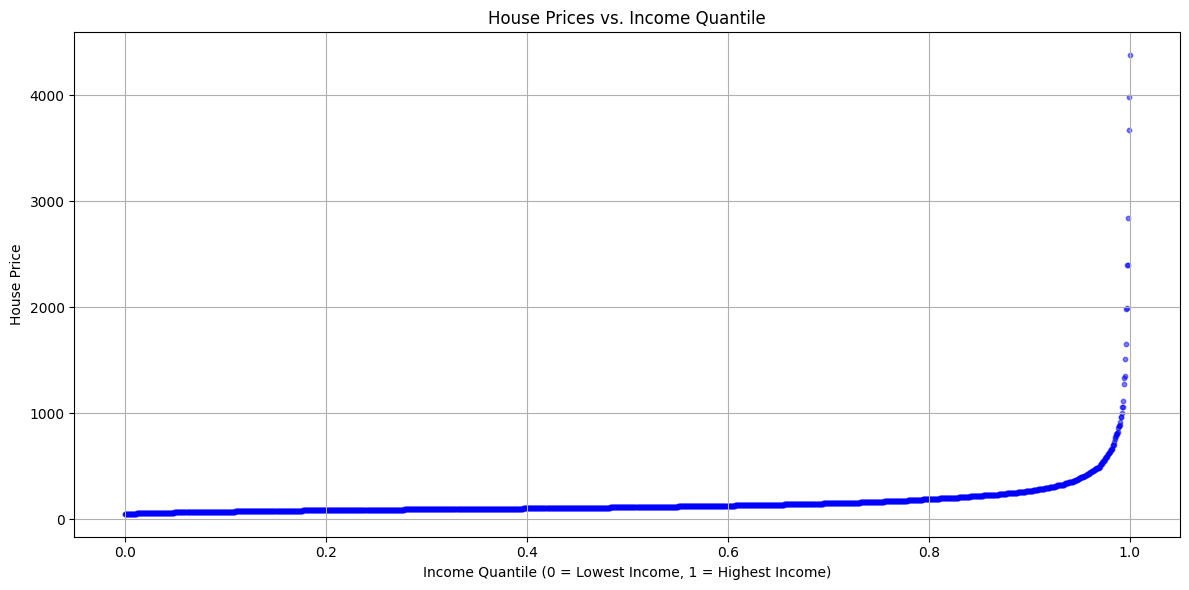

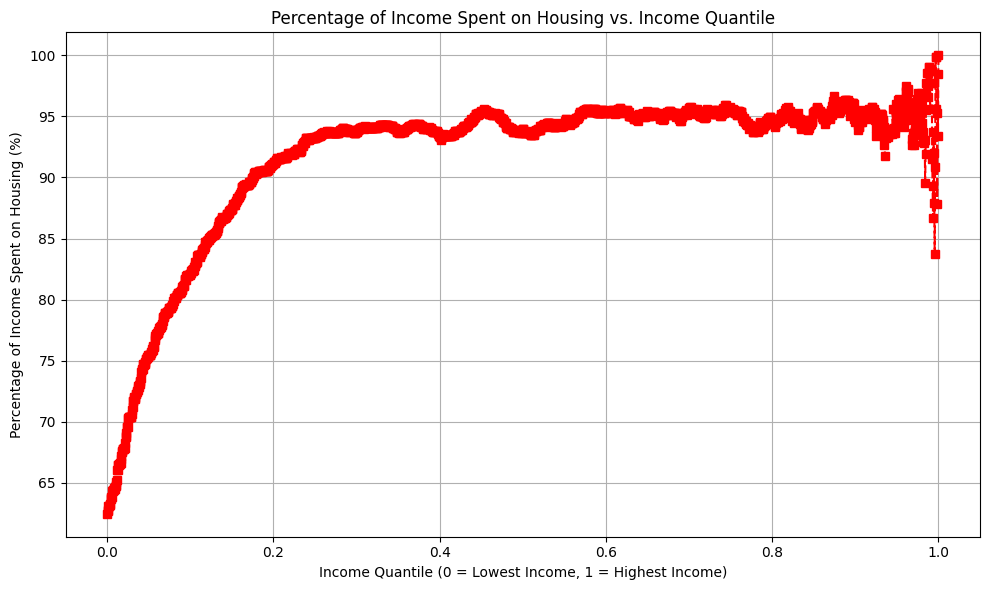

{'average': np.float64(163.65181632323007), 'median': np.float64(111.4744439050557), 'Q1': np.float64(88.3537812968381), 'Q3': np.float64(163.98678271256603), 'IQR': np.float64(75.63300141572793)}


In [10]:
def compute_statistics(prices):
    average = np.mean(prices)
    median = np.median(prices)
    Q1 = np.percentile(prices, 25)
    Q3 = np.percentile(prices, 75)
    IQR = Q3 - Q1

    statistics = {
        'average': average,
        'median': median,
        'Q1' : Q1,
        'Q3' : Q3,
        'IQR': IQR
    }

    return statistics


def plot_house_prices(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)

    plt.figure(figsize=(12, 6))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, color='b')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title('House Prices vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_percentage_income_spent(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)
    with np.errstate(divide='ignore', invalid='ignore'):
        percentage_spent = np.where(y != 0, (prices / y) * 100, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, percentage_spent, marker='s', linestyle='--', color='r')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_house_prices(y, prices)
plot_percentage_income_spent(y, prices)
print(compute_statistics(prices))

## 2a

In [8]:
def equilibrium_price_recursive(n, c, y, d, j):

    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")

    if j == 0:
        return c  # Base case: first house price is equal to c

    theta_j = np.exp(-(d[j] - d[j - 1]))
    # Recursive call for the previous house (j-1)
    previous_price = equilibrium_price_recursive(n, c, y, d, j - 1)
    equilibrium_price = theta_j * previous_price + (1 - theta_j) * y[j]
    return equilibrium_price

def calc_all_prices(n, c, y, d):
    prices = []
    for j in range(n):
        prices.append(equilibrium_price_recursive(n, c, y, d, j))
    return np.array(prices)


## 4a

### i, ii, iii

Incomes: [  80.00460254   80.03156116   80.04098321 ... 4579.03006985 5386.90181007
 7031.77203189]
Housing Distances: [2.84852048e-03 8.89249041e-03 1.32995771e-02 ... 6.92933469e+01
 7.09240821e+01 7.89962681e+01]
Equilibrium Prices: [  50.           50.18096244   50.31226859 ... 4142.95018654 5143.35401804
 7031.18265613]
-------
{'average': np.float64(175.15614690878), 'median': np.float64(113.63631016179377), 'Q1': np.float64(88.047311254688), 'Q3': np.float64(167.8283056450038), 'IQR': np.float64(79.78099439031581)}
Base Case check passed: 50.0


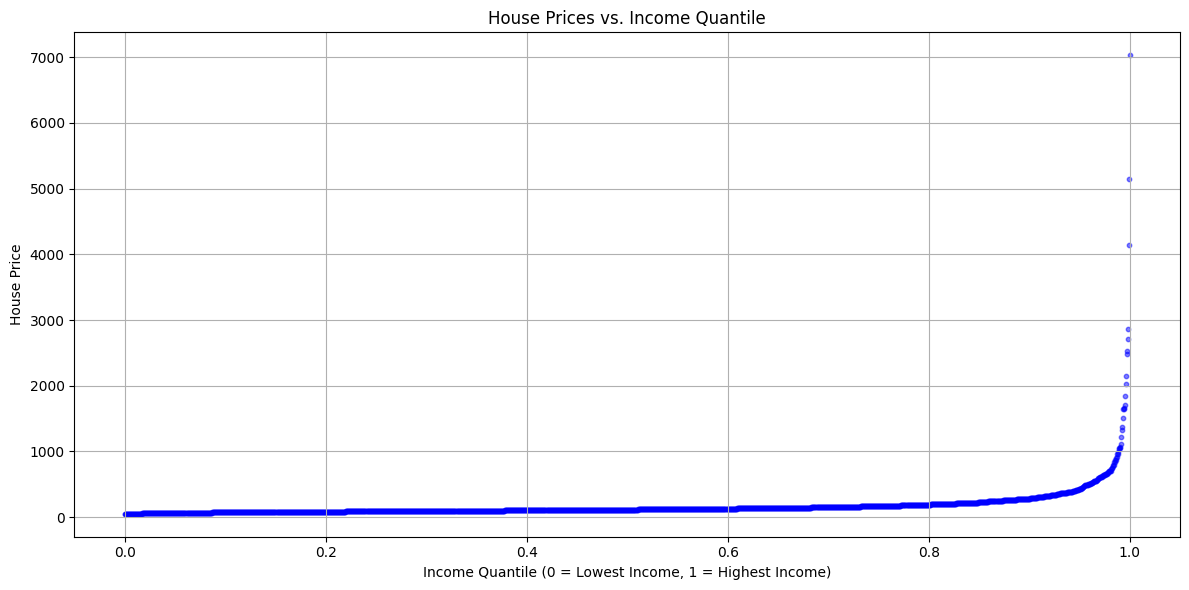

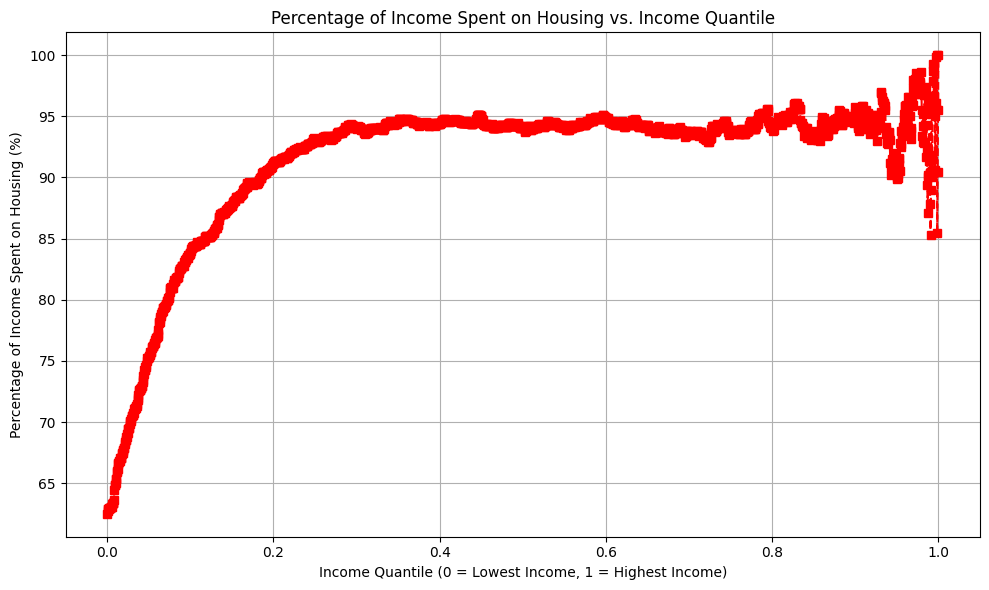

Incomes: [  100.02800643   100.03293094   100.03984405 ... 16528.67118531
 18058.25516942 22432.08730349]
Housing Distances: [4.89241323e-04 7.36609339e-03 8.53766264e-03 ... 7.55232852e+01
 7.80735732e+01 1.04138944e+02]
Equilibrium Prices: [   50.            50.34288872    50.40107805 ... 16528.56617036
 17938.84889416 22432.08730347]
-------
{'average': np.float64(241.16983717458294), 'median': np.float64(139.87501399811458), 'Q1': np.float64(109.44887558342549), 'Q3': np.float64(213.248607723902), 'IQR': np.float64(103.79973214047652)}
Base Case check passed: 50.0


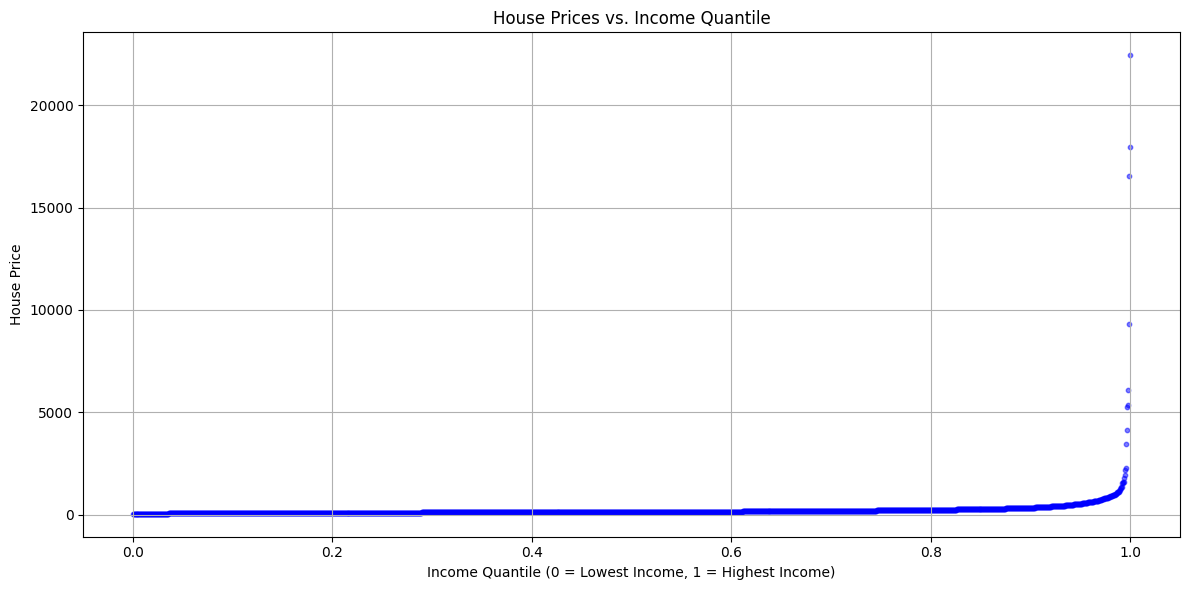

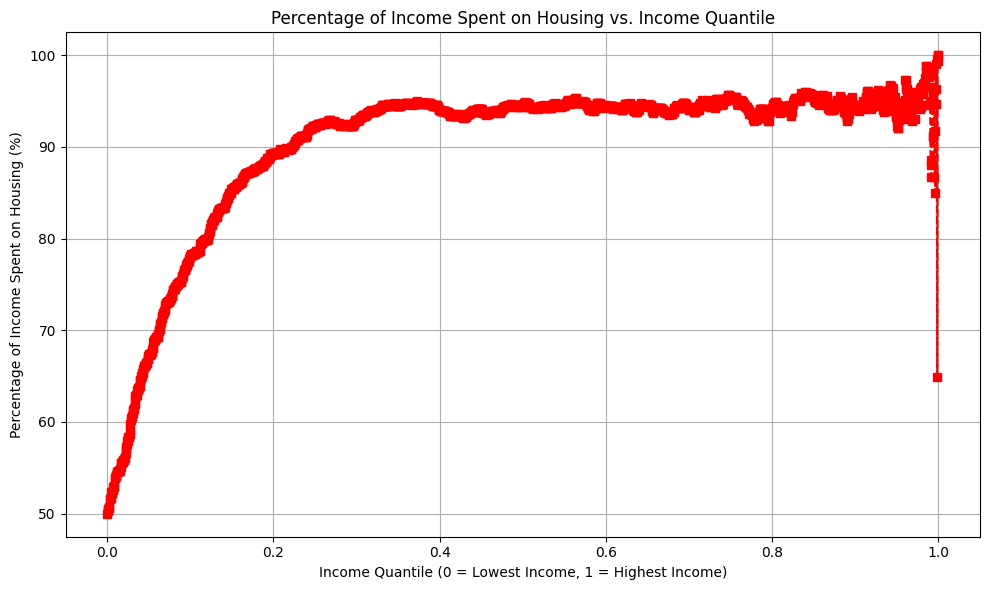

Incomes: [ 150.00694465  150.00743422  150.10512178 ... 6500.99786648 8243.48718051
 9480.22723028]
Housing Distances: [5.82012137e-03 7.98412545e-03 1.83588690e-02 ... 6.09561252e+01
 7.66339205e+01 1.09526765e+02]
Equilibrium Prices: [  50.           50.2161825    51.24714738 ... 4943.72475927 8243.486668
 9480.22723028]
-------
{'average': np.float64(312.63517955768816), 'median': np.float64(209.97933159695637), 'Q1': np.float64(162.28368812120252), 'Q3': np.float64(309.8578513491568), 'IQR': np.float64(147.5741632279543)}
Base Case check passed: 50.0


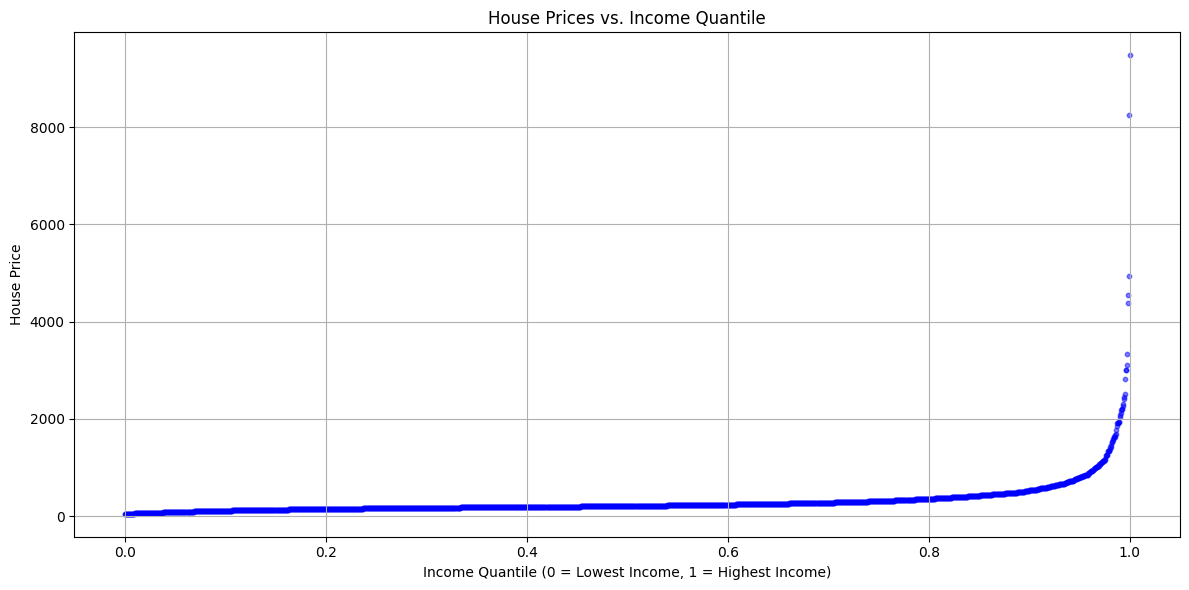

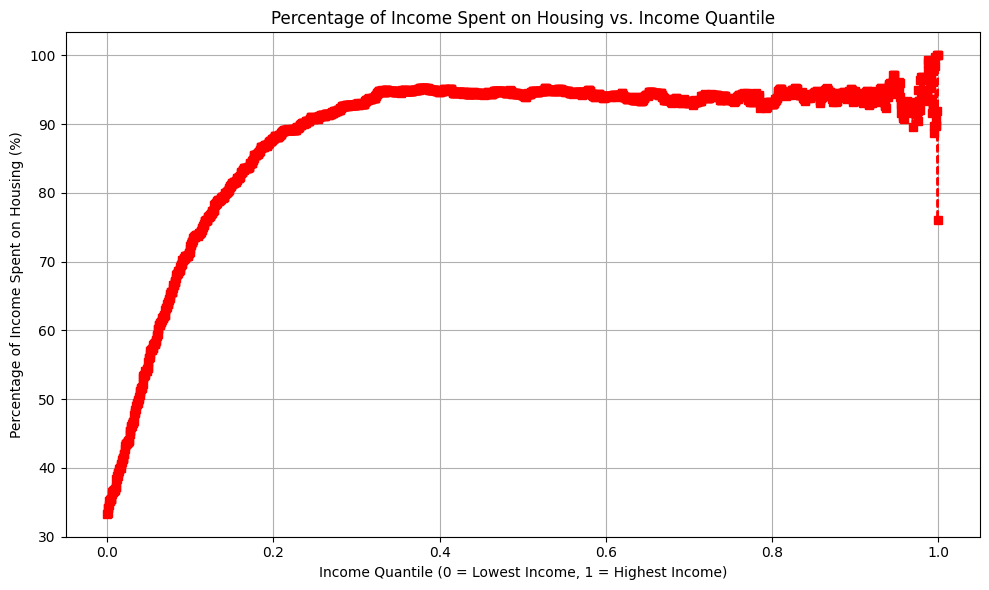

In [12]:
n = 2000
y_min_list = [80,100,150]
alpha = 1.75
mu = 10
c = 50
seed = 1

for y_min in y_min_list:
# Generate data
    y, d = gen_data(n, y_min, alpha, mu, c, seed)
    print("Incomes:", y)
    print("Housing Distances:", d)

    # Calculate equilibrium prices
    prices = calc_all_prices(n, c, y, d)
    print("Equilibrium Prices:", prices)
    print("-------")
    print(compute_statistics(prices))
    # Test the first house price
    base_case_price = prices[0]  # This is the price of house j=1
    if base_case_price == c:
        print(f"Base Case check passed: {base_case_price}")
    else:
        print(f"Base Case check failed: {base_case_price}")

    # plots
    plot_house_prices(y, prices)
    plot_percentage_income_spent(y,prices)


## 2b

In [ ]:
def equilibrium_price_memoized(n, c, y, d, j, memo=None):
    # Initialize memo array if not provided
    if memo is None:
        memo = np.full(n, np.nan)
    
    # Check if value is out of bounds
    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")
    
    # Check if value has been memoized
    if not np.isnan(memo[j]):
        return memo[j]
    
    # Base case: first house
    if j == 0:
        memo[j] = c
        return memo[j]
    
    # Calculate theta_j
    theta_j = np.exp(-(d[j] - d[j - 1]))
    
    # Recursive call for previous house with memoization
    previous_price = equilibrium_price_memoized(n, c, y, d, j - 1, memo)
    
    # Calculate and memoize the equilibrium price
    memo[j] = theta_j * previous_price + (1 - theta_j) * y[j]
    return memo[j]

def calc_all_prices_memoized(n, c, y, d):
    memo = np.full(n, np.nan)
    prices = []
    for j in range(n):
        prices.append(equilibrium_price_memoized(n, c, y, d, j, memo))
    return np.array(prices)


## Running DocTest tests

This last step gets the DocTest system to check test cases in the documentation comments.
In this course, you won't need to modify the stuff below, or even understand the details.

In [ ]:
import doctest
result = doctest.testmod(verbose=False)
if result[0] == 0:
    print(("Congratulations! You have passed all "+str(result[1])+" tests"))
else:
    print("Rats!")

**********************************************************************
File "__main__", line 25, in __main__.equilibrium_price_memoized
Failed example:
    abs(price1 - price2) < 1e-10
Expected:
    True
Got:
    np.True_
**********************************************************************
1 items had failures:
   1 of   9 in __main__.equilibrium_price_memoized
***Test Failed*** 1 failures.
Rats!
